#### Importing the Libraries

In [1]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Bank_Personal_Loan_Modelling (1).csv")

In [3]:
df.shape

(5000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   personal_loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,personal_loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'personal_loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
df.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,personal_loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
for col in df.columns:
    print(f"Unique value in '{col}' are {df[col].unique()}")
    print()

Unique value in 'ID' are [   1    2    3 ... 4998 4999 5000]

Unique value in 'Age' are [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]

Unique value in 'Experience' are [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]

Unique value in 'Income' are [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 10

In [9]:
df.shape

(5000, 14)

In [10]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
personal_loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.corr()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,personal_loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP_Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
personal_loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [13]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'personal_loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [14]:

target=df['personal_loan']
feature = df.drop(['personal_loan'], axis=1)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size=0.3,random_state=42,stratify=target)

C:\Users\awans\AppData\Local\Temp\ipykernel_20068\751940123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='personal_loan',data=y_test.to_frame(),palette='viridis',label=True,ax=axe[0,0])
C:\Users\awans\AppData\Local\Temp\ipykernel_20068\751940123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='personal_loan',data=y_train.to_frame(),palette='viridis',label=True,ax=axe[0,1])
C:\Users\awans\AppData\Local\Temp\ipykernel_20068\751940123.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='personal_loan',data=df,palette='vir

Text(0.5, 1.0, 'Whole data')

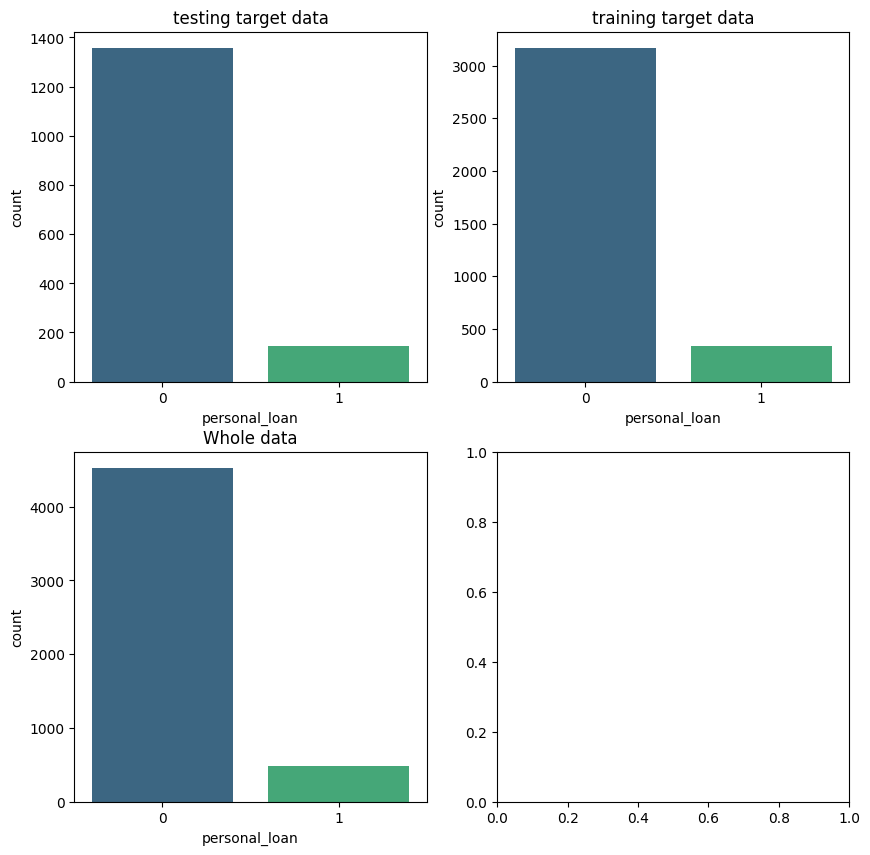

In [16]:
fig,axe=plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='personal_loan',data=y_test.to_frame(),palette='viridis',label=True,ax=axe[0,0])
axe[0,0].set_title("testing target data")

sns.countplot(x='personal_loan',data=y_train.to_frame(),palette='viridis',label=True,ax=axe[0,1])
axe[0,1].set_title("training target data")

sns.countplot(x='personal_loan',data=df,palette='viridis',label=True,ax=axe[1,0])
axe[1,0].set_title("Whole data")


<Axes: >

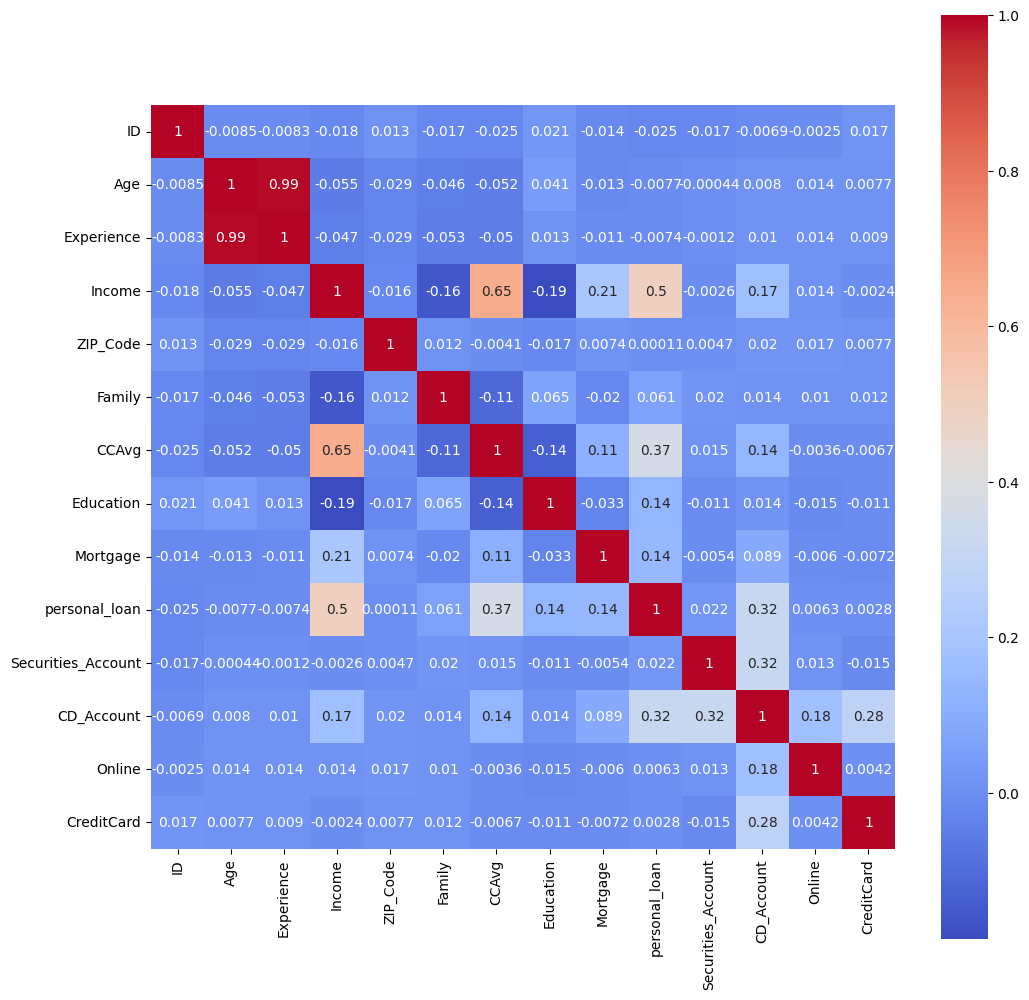

In [17]:
plt.figure(figsize=(12,12))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',square=True)

Personal loan is best correlated with income

### Logistic Regression

In [18]:
model=LogisticRegression()
model.fit(X_train,y_train)


c:\Users\awans\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
prediction=model.predict(X_test)
accuracy=accuracy_score(y_test,prediction)
accuracy*=100
print(accuracy)



93.60000000000001


<img src="image-5.png">

<a href='image-5.png'>

Text(0.5, 23.52222222222222, 'Predicted label')

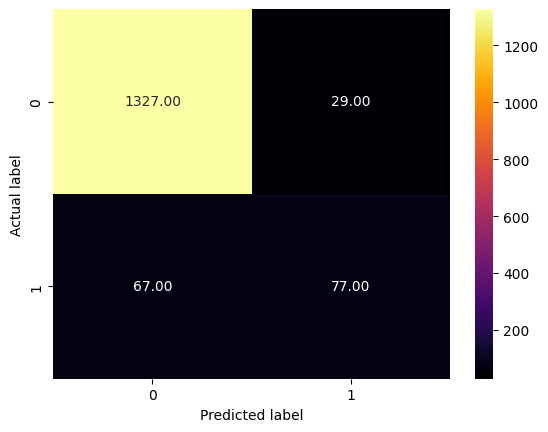

In [20]:
cnf=confusion_matrix(y_test,prediction)

sns.heatmap(cnf,annot=True,cmap='inferno',fmt='.2f')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### classification report


In [21]:
target_Value=['1','0']
print(classification_report(y_test,prediction,target_names=target_Value))

              precision    recall  f1-score   support

           1       0.95      0.98      0.97      1356
           0       0.73      0.53      0.62       144

    accuracy                           0.94      1500
   macro avg       0.84      0.76      0.79      1500
weighted avg       0.93      0.94      0.93      1500



## KNN Algorithm

In [22]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
predict=knn.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
accuracy=accuracy_score(y_test,predict)
accuracy*=100

print(f"accuracy is {accuracy}")


accuracy is 90.06666666666666


In [25]:
cnf=confusion_matrix(y_test,predict)
cnf

array([[1350,    6],
       [ 143,    1]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

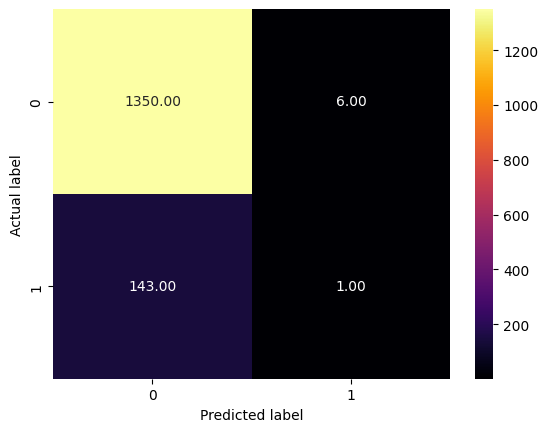

In [26]:


sns.heatmap(cnf,annot=True,cmap='inferno',fmt='.2f')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1356
           1       0.14      0.01      0.01       144

    accuracy                           0.90      1500
   macro avg       0.52      0.50      0.48      1500
weighted avg       0.83      0.90      0.86      1500



### Finding Best value of K

In [28]:
k_value=[i for i in range(1,31)]
scores=[]
scaler=StandardScaler()
X=scaler.fit_transform(feature)

for k in k_value:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,feature,target,cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

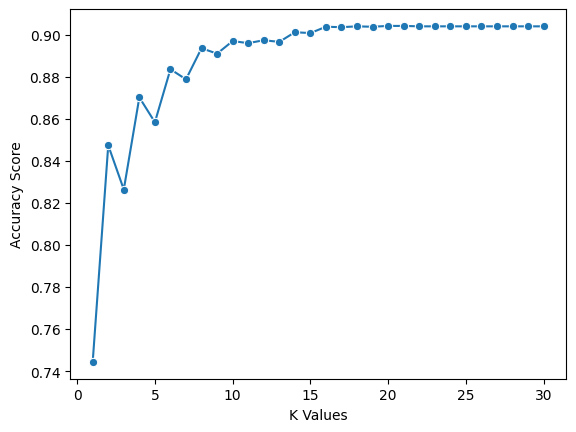

In [29]:
sns.lineplot(x=k_value,y=scores,marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

## 

### Naves Bayes

In [30]:
naive=GaussianNB()
naive.fit(X_train,y_train)
n_predict=naive.predict(X_test)
n_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [31]:
accuray = accuracy_score(n_predict, y_test)
accuracy

90.06666666666666

In [32]:
cnf_naive=confusion_matrix(y_test,n_predict)
cnf_naive=np.round(cnf_naive).astype(int)
cnf_naive

array([[1239,  117],
       [  61,   83]])

Text(0.5, 23.52222222222222, 'Predicted label')

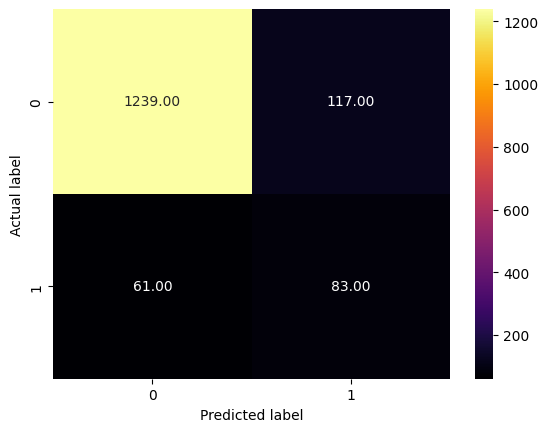

In [33]:
sns.heatmap(cnf_naive,annot=True,cmap='inferno',fmt='.2f')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
test=X_test.iloc[5,:]
test

ID                     4651.0
Age                      47.0
Experience               23.0
Income                   63.0
ZIP_Code              95521.0
Family                    1.0
CCAvg                     0.8
Education                 3.0
Mortgage                  0.0
Securities_Account        0.0
CD_Account                0.0
Online                    1.0
CreditCard                0.0
Name: 4650, dtype: float64

In [35]:
y_test.iloc[5]

0

In [36]:
testing=naive.predict(test.to_frame().T)
testing

array([0], dtype=int64)